Question 1: 
Note(These functions are also included in des.py)

In [1]:
from random import randint
from matplotlib import pyplot as plt
import simulation

In [2]:
def randomNumber(lowerLimit, upperLimit,k):
    seed = 0
    m = 100
    a = 21
    c = 49
    y = seed
    list_numbers = {y}
    for i in range(k):
        y = (y*a+c) % m
        list_numbers.add(y)    
    return list_numbers

In [3]:
def customRandomNumber(lowerLimit, upperLimit):
    sequence = list(randomNumber(lowerLimit, upperLimit,100000))
    index = int(randint(0, len(sequence)-1))
    return sequence[index]*(upperLimit-lowerLimit)/100+ lowerLimit

The randomNumber function returns a list of numbers, which are actually saved in a set so that there would be no duplications, then the customRandomNumber function calls the randomNumber function with a k value of 100000 and saves the list of number in the variable named sequence, then to get an index of the sequence, randint between the beginning and the end of the sequence is called. then the random number is returned.

In order to test the uniformity of the random number generator, in the following cells, there are 100000 random numbers generated and plotted, and as seen further below, the histogram does resemble a uniform probability distribution.

In [49]:
test = [customRandomNumber(0,5) for i in range(100000)]

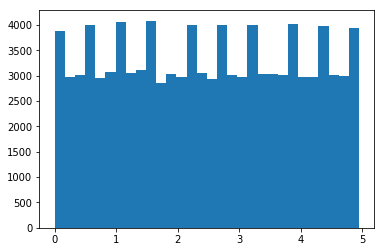

In [51]:
plot_test = plt.hist(test, bins=30)

Question 2: Input Modelling

a) customer_arrivals.csv, val and train sets

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import xlabel, ylabel, title
from random import expovariate

In [3]:
with open('customer_arrivals.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)

customer_arrivals = []
for element in range(0,len(your_list)):
    changed = float(your_list[element][0])
    customer_arrivals.append(changed)

In [4]:
customer_inter_arrivals = []
for i in range(1, len(customer_arrivals)):
    customer_inter_arrivals.append(customer_arrivals[i]-customer_arrivals[i-1])


The customer_inter_arrival list is separated into two sublists where the analysis one is made of 80% of the main list and the 20% that's left is the validation list.

In [5]:
customer_inter_arrivals_analysis = customer_inter_arrivals[:math.floor(80/100*len(customer_inter_arrivals))]

In [6]:
customer_inter_arrivals_val = customer_inter_arrivals[math.floor(80/100*len(customer_inter_arrivals)):]

b) Visualization of the analysis data. 

Text(0.5, 1.0, 'Visualization of the analysis data')

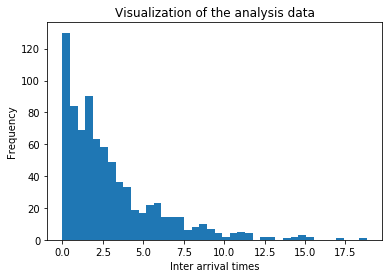

In [7]:
histt = plt.hist(customer_inter_arrivals_analysis, bins=40)
xlabel('Inter arrival times')
ylabel('Frequency')
title('Visualization of the analysis data')

As seen in the histogram above, the data follows an exponential distribution. 

c) Exponential distribution is the chosen prametric distribution. A parametric model will be fitted.

d) The parameters of the parametric distribution.

In [8]:
exponential_lambda = len(customer_inter_arrivals_analysis)/sum(customer_inter_arrivals_analysis)

In [9]:
exponential_lambda

0.3347536271959042

In [10]:
expovariate(exponential_lambda)

0.22761732001692084

In [11]:
exponential_data = [expovariate(exponential_lambda) for x in range(len(customer_inter_arrivals_analysis))]

Text(0.5, 1.0, 'Visualization of data from exponential distribution')

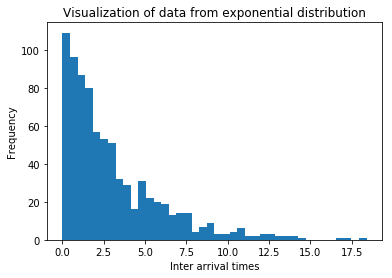

In [12]:
histt = plt.hist(exponential_data, bins=40)
xlabel('Inter arrival times')
ylabel('Frequency')
title('Visualization of data from exponential distribution')

As viewed from the two graphs above, they are quite similar which confirms the choice of the appropriate probability distribution. 

e) The simulation from assignment 2 is used for this part and is fixed regarding these probability distributions.

The simulation model is edited so that the selected probability distribution is used for customer's arrival. However the other random numbers are generated from the function wrote for Question 1.

In order to run the simulation model, the following line can be executed and the function will show the number of happy customers, unhappy ones and rotten cabbages.

In [14]:
simulation.run(8, 5)

5 customers went home happy with cabbages.
0 customers went home unhappy without cabbages.
3 cabbages sadly went rotten.


3. Input Validation

In [15]:
customer_inter_arrivals_val = customer_inter_arrivals[math.floor(80/100*len(customer_inter_arrivals)):]

The CDF of the model.

$F(x)=1-e^{-\lambda x}$

In [16]:
import math

def exponential_cdf(lambdaparameter,value):
    return 1 - math.exp(-lambdaparameter*value)

In [17]:
def exponential_cdf_lambda(value):
    return exponential_cdf(exponential_lambda,value)

In [18]:
def exponential_cdf_inv(lambdaparam,F):
    return -math.log(1-F)/lambdaparam

Quantile Quantile Plot

(array([77., 44., 33., 23.,  6.,  8.,  2.,  2.,  4.,  1.]),
 array([1.0000e-02, 1.3940e+00, 2.7780e+00, 4.1620e+00, 5.5460e+00,
        6.9300e+00, 8.3140e+00, 9.6980e+00, 1.1082e+01, 1.2466e+01,
        1.3850e+01]),
 <a list of 10 Patch objects>)

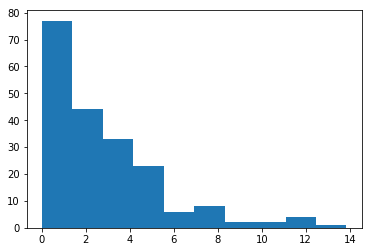

In [19]:
plt.hist(customer_inter_arrivals_val)

In [20]:
def Dstatistic(data):

    data = sorted(data)
    maxdiff = 0
    for i in range(len(data)):
        theoretical_cdf = exponential_cdf_lambda(data[i])
        empirical_cdf = i/len(data)
        maxdiff = max(maxdiff,abs(theoretical_cdf-empirical_cdf))
        empirical_cdf = (i+1)/len(data)
        maxdiff = max(maxdiff,abs(theoretical_cdf-empirical_cdf))

    return maxdiff

In [21]:
print(Dstatistic(customer_inter_arrivals_val))
data = customer_inter_arrivals_val

0.06198550932354141


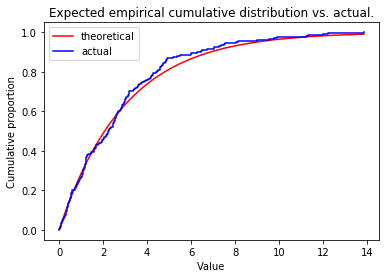

0.06198550932354141

In [22]:
plotx = []
plot_theoretical_y = []
plot_empirical_y = []
data = sorted(data)
plt.figure()
maxdiff = 0
for i in range(len(data)):
    theoretical_cdf = exponential_cdf_lambda(data[i])
    empirical_cdf = i/len(data)
    plotx.append(data[i])
    plot_theoretical_y.append(theoretical_cdf)
    plot_empirical_y.append(empirical_cdf)
    maxdiff = max(maxdiff,abs(theoretical_cdf-empirical_cdf))

    empirical_cdf = (i+1)/len(data)
    plotx.append(data[i])
    plot_theoretical_y.append(theoretical_cdf)
    plot_empirical_y.append(empirical_cdf)
    maxdiff = max(maxdiff,abs(theoretical_cdf-empirical_cdf))

plt.plot(plotx,plot_theoretical_y,'r',label='theoretical')
plt.plot(plotx,plot_empirical_y,'b',label='actual')
plt.title('Expected empirical cumulative distribution vs. actual.')
plt.xlabel('Value')
plt.ylabel('Cumulative proportion')
plt.legend()
plt.show()
maxdiff

4. Input Output Validation


In [23]:
with open('experiments.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
Numcabbagesshelf = []
Numcabbagesbought = []
Numcustomerswithoutcabbages = []
Numrottencabbages = []
for i in range(1,len(your_list)):
    Numcabbagesshelf.append(int(your_list[i][1]))
    Numcabbagesbought.append(int(your_list[i][2]))
    Numcustomerswithoutcabbages.append(int(your_list[i][3]))
    Numrottencabbages.append(int(your_list[i][4]))
    

In [24]:
your_list

[['HDR',
  'Num cabbages on shelf',
  'Num cabbages bought',
  'Num customers without cabbages',
  'Num rotten cabbages'],
 ['EXP', '8', '968', '32', '606'],
 ['EXP', '9', '993', '7', '706'],
 ['EXP', '10', '991', '9', '952']]

In [ ]:
simulation.run(8,Numcabbagesbought[0])

In [47]:
NUM_SAMPLES = 10000

In [50]:
sim_Dstats=[]
for sample_num in range(NUM_SAMPLES):
    sim_data = [expovariate(1) for d in range(len(data))]
    D = Dstatistic(sim_data)
    sim_Dstats.append(D)

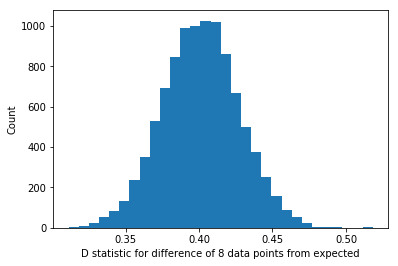

In [51]:
plt.hist(sim_Dstats,bins=30)
plt.ylabel('Count')
plt.xlabel('D statistic for difference of 8 data points from expected')
plt.show()

In [52]:
Pvalue_thresh=0.001

sim_Dstats=sorted(sim_Dstats)
thresh_index = int((1-Pvalue_thresh)*len(sim_Dstats))
Dstat_thresh=sim_Dstats[thresh_index]
Dstat_thresh

0.48387456364465276

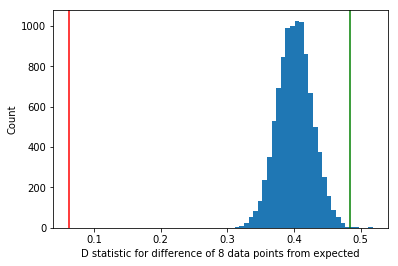

In [60]:
plt.hist(sim_Dstats,bins=30)
plt.axvline(Dstatistic(data),color='r')
plt.axvline(Dstat_thresh,color='g')
plt.ylabel('Count')
plt.xlabel('D statistic for difference of 8 data points from expected')
plt.show()

In [59]:
bigger_dstats = [d for d in sim_Dstats if d>Dstatistic(data)]
Pvalue_effective = len(bigger_dstats)/len(sim_Dstats)
Pvalue_effective

1.0

5. Experimentation

scatter plots

In [63]:
expected = []
data = sorted(data)
for i in range(len(data)):
    expected.append(exponential_cdf_inv(exponential_lambda,(i-0.5)/len(data)))
    

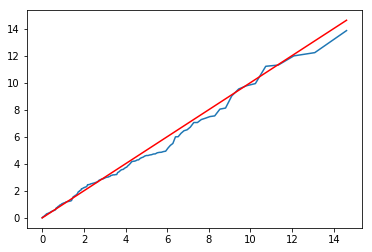

In [65]:
plt.plot(expected,data)
plt.plot(expected,expected, 'r')

In [89]:
expectedData = [expovariate(exponential_lambda) for x in range(len(data))]

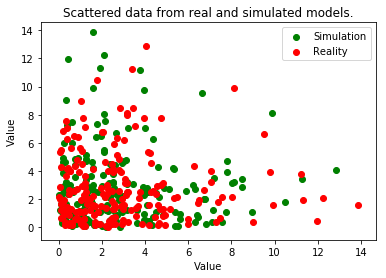

In [98]:
plt.scatter(expectedData, data, color='g', label='Simulation')
plt.scatter(data, expectedData, color='r', label='Reality')
plt.title('Scattered data from real and simulated models.')
plt.xlabel('Value')
plt.ylabel('Value')
plt.legend()
